# predicting the house price based on the information of houses in tehran province.

### in this project I have used two models.
### one model is a non-linear regression based on one variable and the other one is a multiple linear regression based on three variables.
### in both models the maximum reachable R2-score was 0.72

In [129]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sb
%matplotlib inline

In [163]:
df=pd.read_csv(r"C:\Users\mohad\Downloads\1632300362534233.csv")
df.head(10)

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33
5,70,2,True,True,False,North Program Organization,2.050000e+09,68333.33
6,87,2,True,True,True,Pardis,6.000000e+08,20000.00
7,59,1,True,True,True,Shahran,2.150000e+09,71666.67
8,54,2,True,True,False,Andisheh,4.930000e+08,16433.33
9,71,1,True,True,True,West Ferdows Boulevard,2.370000e+09,79000.00


In [44]:
df.describe()

,Room,Price,Price(USD)
count,3479.000000,3.479000e+03,3.479000e+03
mean,2.079908,5.359023e+09,1.786341e+05
std,0.758275,8.099935e+09,2.699978e+05
min,0.000000,3.600000e+06,1.200000e+02
25%,2.000000,1.418250e+09,4.727500e+04
50%,2.000000,2.900000e+09,9.666667e+04
75%,2.000000,6.000000e+09,2.000000e+05
max,5.000000,9.240000e+10,3.080000e+06


### removing null addresses

In [164]:
df['Address'].dropna()

0                  Shahran
1                  Shahran
2                   Pardis
3            Shahrake Qods
4           Shahrake Gharb
               ...        
3474    Southern Janatabad
3475              Niavaran
3476                Parand
3477                Dorous
3478                Parand
Name: Address, Length: 3456, dtype: object

### removing big areas

In [165]:
df['Area'] = df['Area'].str.replace(',', '')
df['Area'] = df['Area'].astype(float)
df = df[df['Area'] < 1000]
print(len(df.Area))

3473


### relation between area and price is similar to a logarithmic relation

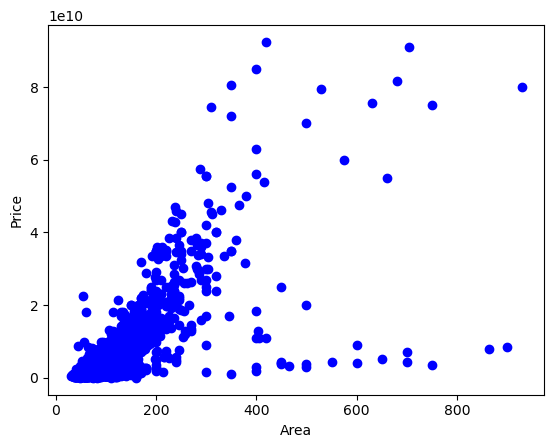

In [158]:
plt.scatter(df.Area,df.Price,color='blue')
plt.xlabel("Area")
plt.ylabel("Price")
plt.show()

### converting addresses into numerical values
#### label encoder assigns each address a value alphabetically which is not desired and I think thats why 
#### the chart does not give an comprehensible vision to figure out the relation.

0       124
1       112
2       117
3       115
4        13
       ... 
3474    189
3475    105
3476     14
3477    146
3478    183
Name: Address, Length: 3473, dtype: int32


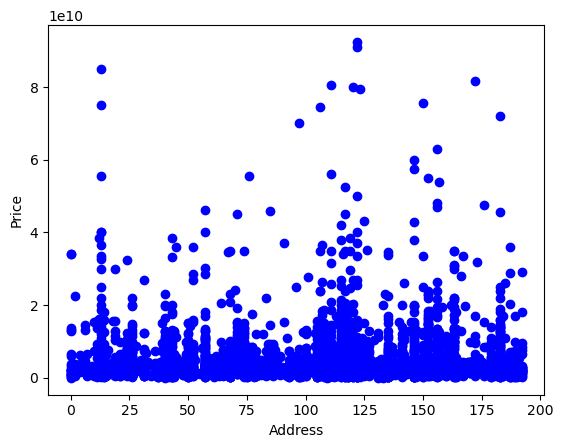

In [185]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df.Address = label.fit_transform(labeledAddress.Address)
print(df.Address)
plt.scatter(df.Address,df.Price,color='blue')
plt.xlabel('Address')
plt.ylabel('Price')
plt.show()

### creating a dataframe which indicates each region and their price per area

In [99]:
pricePerArea=df['Price']/df['Area']
d = {'Address': df['Address'], 'pricePerArea': pricePerArea}
importances=pd.DataFrame(data=d)
print(importances)

                 Address  pricePerArea
0                Shahran  2.936508e+07
1                Shahran  3.083333e+07
2                 Pardis  6.962025e+06
3          Shahrake Qods  9.500000e+06
4         Shahrake Gharb  5.691057e+07
...                  ...           ...
3474  Southern Janatabad  4.069767e+07
3475            Niavaran  8.192771e+07
3476              Parand  4.866667e+06
3477              Dorous  5.333333e+07
3478              Parand  4.390244e+06

[3473 rows x 2 columns]


### sorting addresses according to pricePerAea in ascending order.which means regions in downtown(lower price per area) get lower order.

In [101]:
from sklearn.linear_model import LogisticRegression
labeledAddress = importances.sort_values(by='pricePerArea')
print(labeledAddress)

                     Address  pricePerArea
136                  Qarchak  2.250000e+04
2770                   Ozgol  6.626506e+05
731                   Pardis  8.000000e+05
2721                  Parand  9.272727e+05
2201                Andisheh  2.244898e+06
...                      ...           ...
1707              Zaferanieh  2.200000e+08
1332                Niavaran  2.300000e+08
2394                Aqdasieh  2.400000e+08
3132            Shahr-e-Ziba  3.000000e+08
3394  West Ferdows Boulevard  4.166667e+08

[3473 rows x 2 columns]


### we can assume an approximate line. although the relation between address and price is somehow non-linear and logarithmic

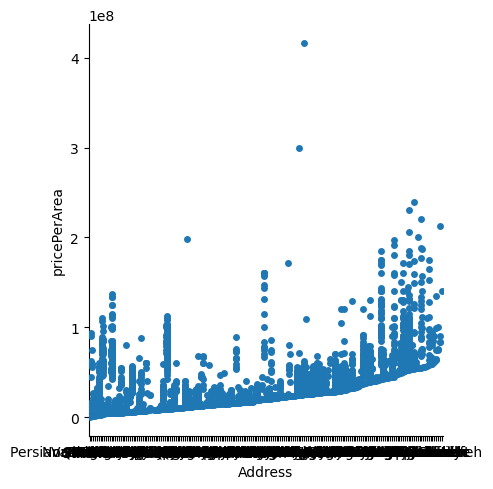

In [107]:
import seaborn as sns
sns.catplot(data=labeledAddress, x="Address", y="pricePerArea")

### the relation between room and price is somehow logarithmic

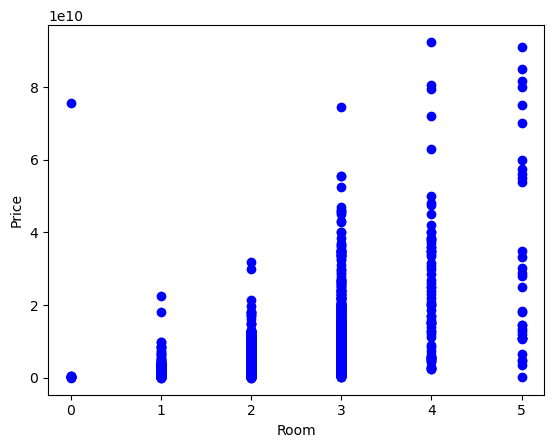

In [10]:
plt.scatter(df.Room,df.Price,color='blue')
plt.xlabel("Room")
plt.ylabel("Price")
plt.show()

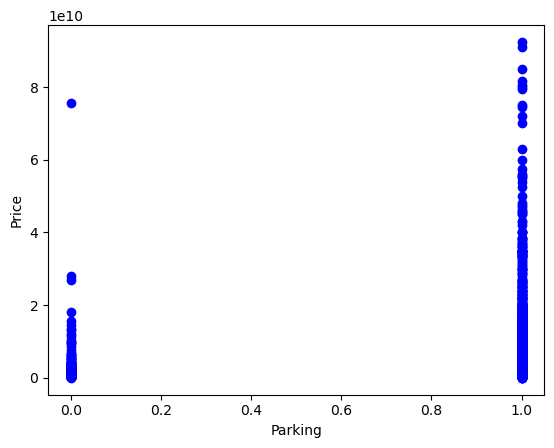

In [12]:
plt.scatter(df.Parking,df.Price,color='blue')
plt.xlabel("Parking")
plt.ylabel("Price")
plt.show()

### comparing three features(address,area,room) together

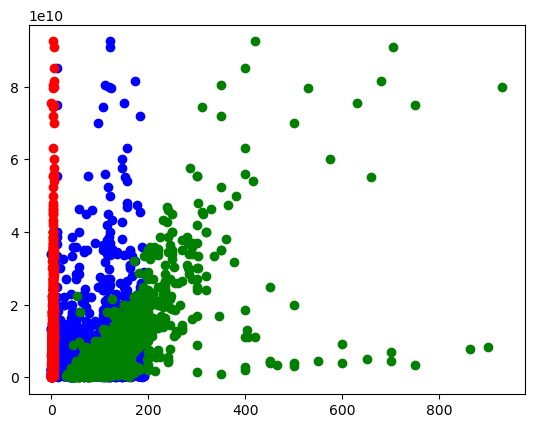

In [348]:
plt.scatter(df.Address,df.Price,color='blue')
plt.scatter(df.Room,df.Price,color='red')
plt.scatter(df.Area,df.Price,color='green')

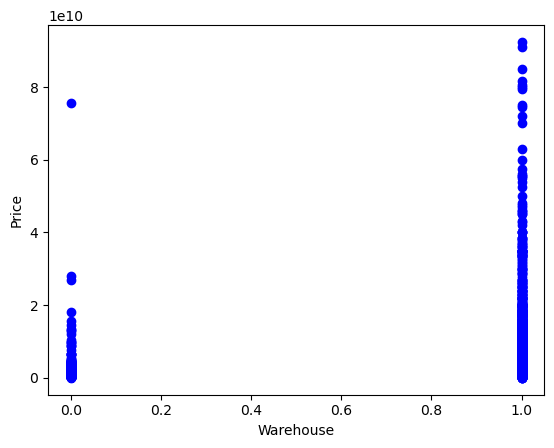

In [13]:
plt.scatter(df.Warehouse,df.Price,color='blue')
plt.xlabel("Warehouse")
plt.ylabel("Price")
plt.show()

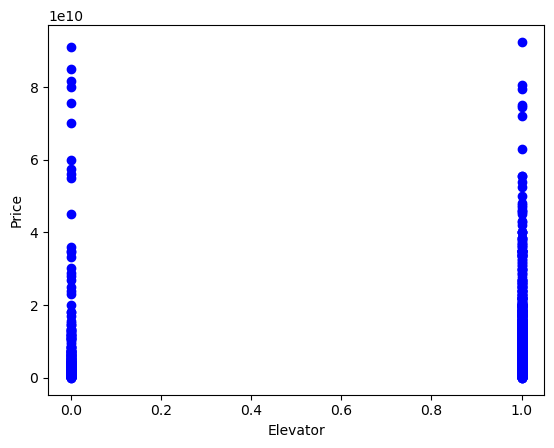

In [143]:
plt.scatter(df.Elevator,df.Price,color='blue')
plt.xlabel("Elevator")
plt.ylabel("Price")
plt.show()

### selecting required columns
#### area,address and room are features that influence the price the most according to charts

In [186]:
newdf=df[['Area','Address','Room','Price']]
newdf.head()

,Area,Address,Room,Price
0,63.0,124,1,1.850000e+09
1,60.0,112,1,1.850000e+09
2,79.0,117,2,5.500000e+08
3,95.0,115,2,9.025000e+08
4,123.0,13,2,7.000000e+09


### normalizing Area and Price features

In [205]:
newdf['Area']=newdf['Area']/max(newdf['Area'])
newdf['Price']=newdf['Price']/max(newdf['Price'])
print(newdf['Area'])

0       0.067815
1       0.064586
2       0.085038
3       0.102260
4       0.132400
          ...   
3474    0.092573
3475    0.089343
3476    0.080732
3477    0.113025
3478    0.088267
Name: Area, Length: 3473, dtype: float64


C:\Users\mohad\AppData\Local\Temp\ipykernel_8448\3081454586.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['Area']=newdf['Area']/max(newdf['Area'])
C:\Users\mohad\AppData\Local\Temp\ipykernel_8448\3081454586.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['Price']=newdf['Price']/max(newdf['Price'])


### creating train/test datasets

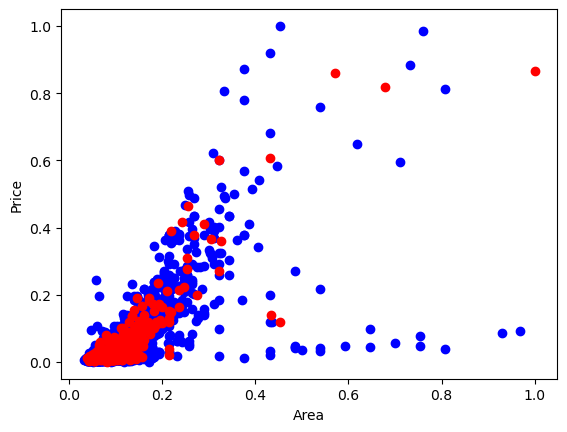

In [344]:
msk=np.random.rand(len(df))<0.9
train=newdf[msk]
test=newdf[~msk]
fig=plt.figure()
plot1=fig.add_subplot()
plot1.scatter(train['Area'],train['Price'],color='blue')
plot1.scatter(test['Area'],test['Price'],color='red')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

### first non-linear model based on Area feature.

In [181]:
def logarithm(x,a,b):
      return np.log(a*x+b)

In [345]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(logarithm,train['Area'],train['Price'])
print(popt)
print(pcov)
#print the final parameters
print(" a = %f, b = %f" % (popt[0], popt[1]))

[1.00446622 0.94587449]
[[ 3.61294572e-04 -3.87437579e-05]
 [-3.87437579e-05  5.42341531e-06]]
 a = 1.004466, b = 0.945874


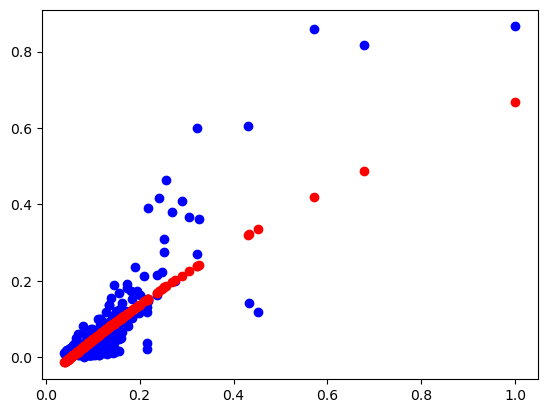

In [346]:
y_hat=logarithm(test['Area'],*popt)
plt.scatter(test['Area'],test['Price'],color='blue')
plt.scatter(test['Area'],y_hat,color='red')
plt.show()

In [347]:
from sklearn.metrics import r2_score
print("MSE is : %d",np.mean(((y_hat-test['Price'])**2)))
print("R2-score: %.2f" % r2_score(test['Price'],y_hat ))

MSE is : %d 0.003358225002878744
R2-score: 0.70


### second linear model based on Area,Address and Room features.

In [349]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['Area','Address','Room']])
y = np.asanyarray(train[['Price']])
regr.fit (x, y)
print ('Coefficients: ', regr.coef_)

Coefficients:  [[6.53409066e-01 1.39621918e-05 2.22873723e-02]]


In [352]:
y_hat1= regr.predict(test[['Area','Address','Room']])
x = np.asanyarray(test[['Area','Address','Room']])
y = np.asanyarray(test[['Price']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat1 - y) ** 2))

# Explained variance score: 1 is perfect prediction
#print('Variance score: %.2f' % regr.score(x, y))
print("R2-score: %.2f" % r2_score(test['Price'],y_hat1))

Residual sum of squares: 0.00
R2-score: 0.66


C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
